## Assignment A3b: Filtering

### John Mays (jkm100)

In [1]:
# Imports:

import numpy as np

from A1b_jkm100 import *
from A3a_jkm100 import *
from A3b_jkm100 import *

### 1. Filtering

### 1a. A moving average filter

\begin{align*}
y_M[n] &= \frac{1}{M} \sum_{k=0}^{M-1} x[n-k]\\
&=\frac{1}{M}(x[n]+x[n-1]+x[n-2]+\dots + x[0])\\
&= \frac{1}{M}x[n] + \frac{1}{M}(x[n-1]+x[n-2]+\dots + x[0])\\
&= \frac{1}{M}x[n] + \frac{1}{M}\sum_{k=0}^{M-2} x[n-k]\\
\frac{M}{M-1}y_M[n] &= \frac{M}{M-1}\frac{1}{M}x[n] + \frac{M}{M-1}\frac{1}{M}\sum_{k=0}^{M-2} x[n-k]\\
\frac{M}{M-1}y_M[n] &= \frac{M}{M-1}\frac{1}{M}x[n] + y_{M-1}[n-1]\\
y_M[n] &= \frac{1}{M}x[n] + \frac{M-1}{M}y_{M-1}[n-1] \textit{ (now, } \lambda = \frac{M-1}{M}\textit{)}\\
y_M[n] &= (1-\lambda)x[n] + \lambda y_{M-1}[n-1]\\
\therefore y[n] &= (1-\lambda)x[n] + \lambda y[n-1]
\end{align*}

As $\lambda$ becomes smaller, the equation emphasizes $x[n]$, the current value, more, there is less smoothing, and the filtered function essentially becomes more "jagged."  On the other hand, as $\lambda$ becomes larger, the filtered function becomes smoother, as $y[n]$ will be more similar to $y[n-1]$.

### 1b. Implementation

In [2]:
x = randprocess(100)
y = movingavg(x, lam=0.75)

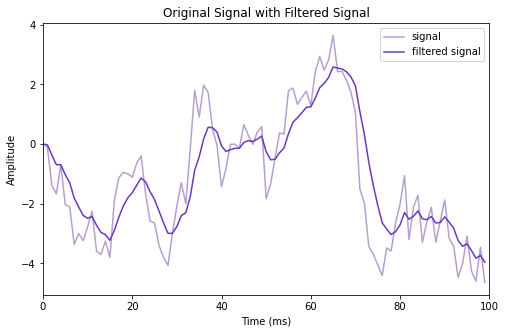

In [3]:
plotsignalandfilter(x, y)

In [4]:
t = np.linspace(0, 250, 251)
sine_signal = noisysignal(t, g= lambda x: sinewave(x, f=0.01),tau=0.0, T=np.size(t), sigma=0.25)
filtered_sine_signal = movingavg(sine_signal, lam=0.90, centered=False)

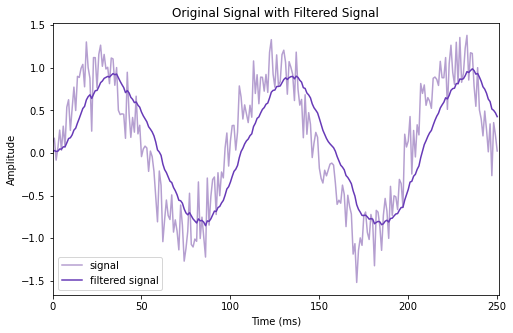

In [5]:
plotsignalandfilter(sine_signal, filtered_sine_signal)

### 1c. System delay

The delay is a product of the fact that the average is for all elements preceeding point of average; it incorporates none of the signal to the right of the index being averaged at.  The severity of the lag will increase as $\lambda$ increases, because the proportional emphasis of the values to the left will increase in the filtered signal.

The way to remedy this is incorperating a delay, which is $\approx \frac{(1-\lambda)}{\lambda}$ steps.  This is calculated using the fact that, in an askew signal, the point $y[n]$ would be centered if $(1-\lambda)$ was zero (none of the signal to the left is incorporated).  The ratio $\frac{1-\lambda}{\lambda}$ demonstrates how much of data to the left of $x[n]$ is incorporated, and how *'askew'*, the filtered signal will seem.

Demo: just change the boolean argument `centered` of `movingavg` from `False` to `True` and you can see the results

------

space for printing

------

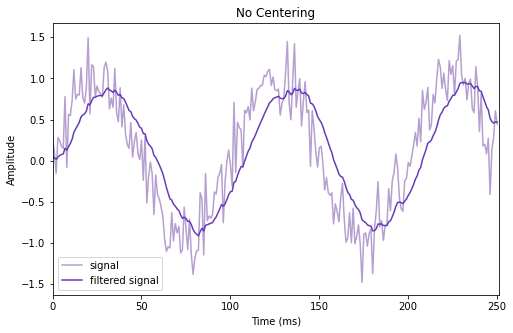

In [6]:
t = np.linspace(0, 250, 251)
sine_signal = noisysignal(t, g= lambda x: sinewave(x, f=0.01),tau=0.0,\
 T=np.size(t), sigma=0.25)
filtered_sine_signal = movingavg(sine_signal, lam=0.90, centered=False)
plotsignalandfilter(sine_signal, filtered_sine_signal, title="No Centering")

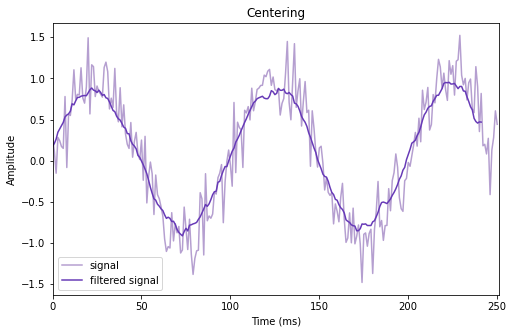

In [7]:
filtered_sine_signal = movingavg(sine_signal, lam=0.90, centered=True)
plotsignalandfilter(sine_signal, filtered_sine_signal, title = "Centering")

### 2. IIR Filters

### 2a. Implementation

Proving that `filterIIR()` can reproduce the output of the `movingavg()` filter:

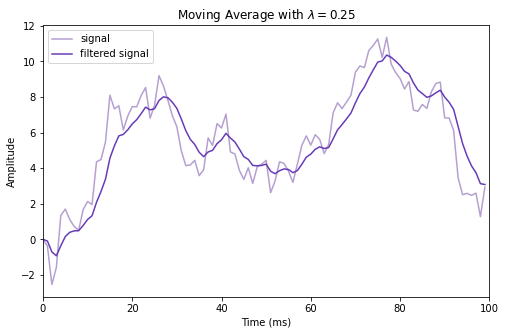

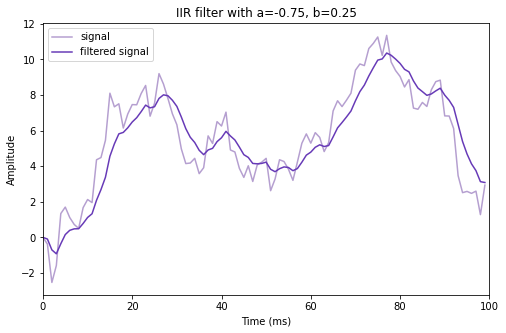

In [8]:
x = randprocess(100)
y = movingavg(x, lam=0.75)
plotsignalandfilter(x, y, title="Moving Average with $\lambda=0.25$")
y = filterIIR(x, [-0.75], [0.25])
plotsignalandfilter(x, y, title="IIR filter with a=-0.75, b=0.25")

### 2b. First order low- and high-pass IIR filters

In [9]:
x = randprocess(150)

LPF:

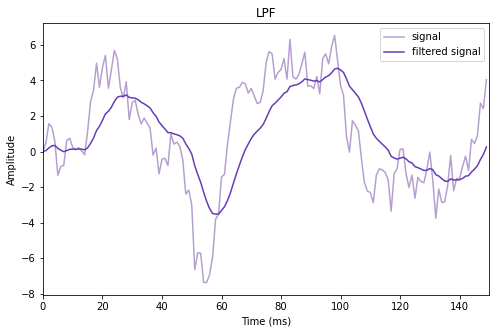

In [10]:
y = filterIIR(x, a=[-0.9], b=[0.1])
plotsignalandfilter(x, y, title="LPF")

HPF:

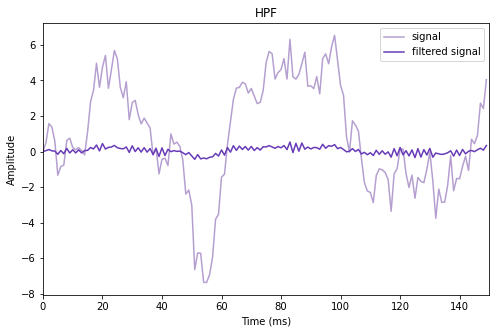

In [11]:
y = filterIIR(x, a=[0.9], b=[0.1])
plotsignalandfilter(x, y, title="HPF")

The difference equations are:

For **LPF**:
$$y[n]=0.1x[n]+0.9y[n-1]$$

For **HPF**:
$$y[n]=0.1x[n]-0.9y[n-1]$$

The difference equation for the **LPF** has a positive coefficient for previous $y$ values, which allows more gradual changes to be accounted for in the filtered signal via accumulation.  On the other hand, the equation for the **HPF** subtracts the previous filter value, which discourages the presence of large-scale changes by recursively adding then subtracting that accumulated value, therefore really never letting it accumulate in the first place.

### 2c. Second order bandpass filters

First Filter:

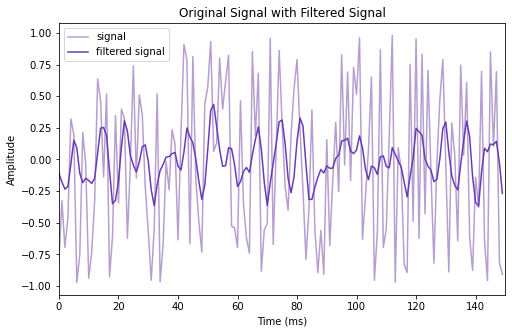

In [12]:
x = uniformnoise(150)
y = filterIIR(x, a=[-1.265, 0.81], b=[0.135])
plotsignalandfilter(x, y)

Second Filter:

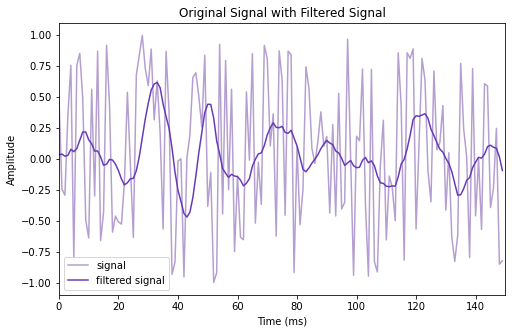

In [13]:
x = uniformnoise(150)
y = filterIIR(x, a=[-1.702, 0.81], b=[0.063])
plotsignalandfilter(x, y)

The difference equations are:

For **BPF 1**:
$$y[n]=0.135x[n]+1.265y[n-1]-0.810y[n-2]$$

For **BPF 2**:
$$y[n]=0.063x[n]+1.702y[n-1]-0.810y[n-2]$$

Using similar reasoning from **2b**, I believe changes over time are largely ignored because a component of the signal at index $n-2$ is recursively subtracted each time, therefore diminishing over time and disallowing the accumulation of amplitude.  On the other hand, the filtered signal's previous value $(y[n-1])$ is added, to the current value, which is essentially just traditional average filtering, which disallows small changes (higher frequencies) to be reflected in the filtered signal.

### 2d. Characterizing the filter response

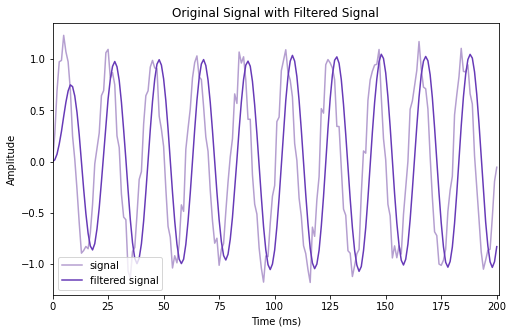

In [14]:
t = np.linspace(0.0, 0.10, 201)
s = noisysignal(t, g=lambda t: sinewave(t, f=100), tau=0.0,T=0.10,sigma=0.1)
filtered_s = filterIIR(s, a=[-1.702, 0.81], b=[0.063])
plotsignalandfilter(s, filtered_s)

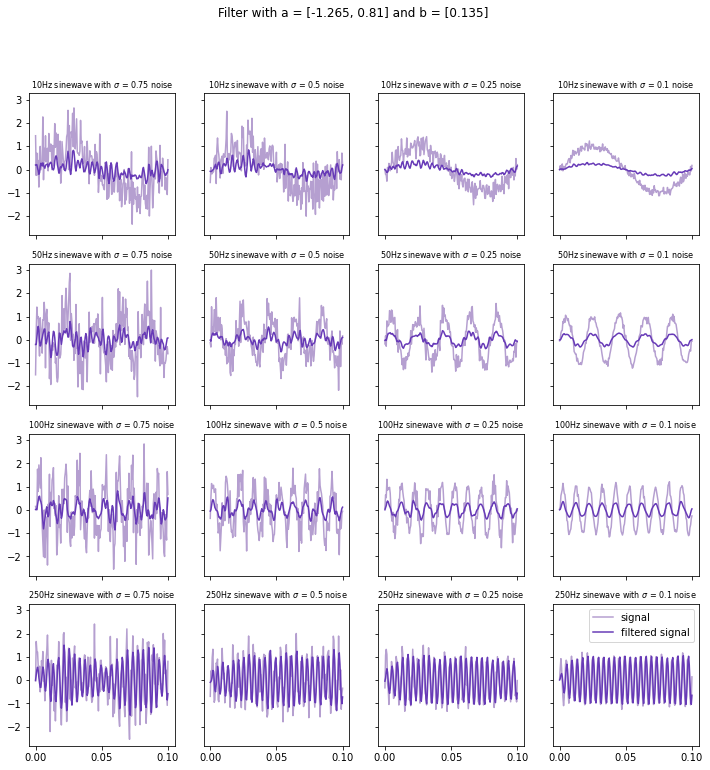

In [15]:
plotfilterresponsegraph(a=[-1.265, 0.81], b=[0.135])

For this filter, it seems as if lower frequencies, on the order of 1 and 10 Hz, are hardly captured at all, the output is consistently at a much weaker amplitude than the input, despite there being one coefficient greater than 1.  It seems to capture plenty of noise, but not the highest noise frequencies.

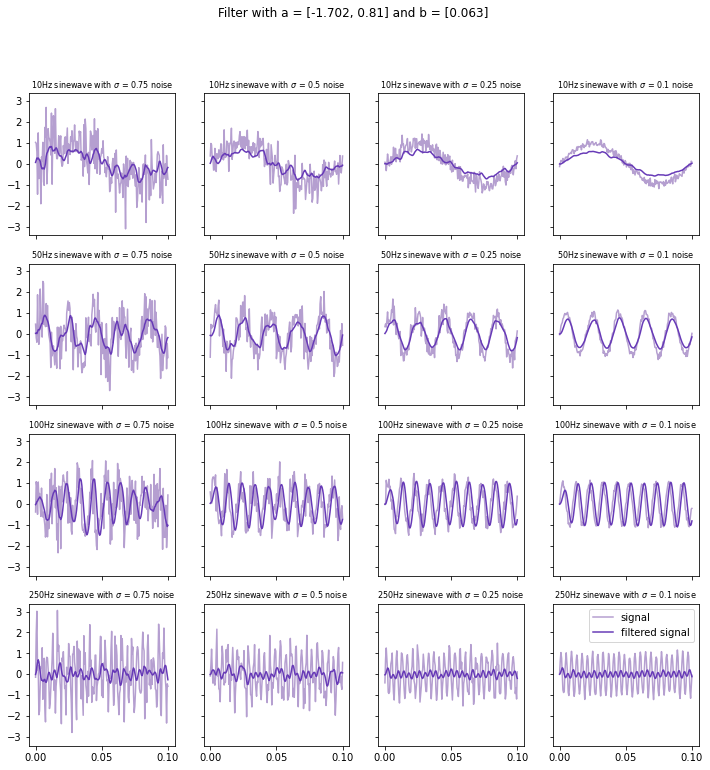

In [16]:
plotfilterresponsegraph(a=[-1.702, 0.81], b=[0.063])

This filter seems to caputre 100Hz and 50Hz sinewaves almost perfectly, and filters out the noise on them exceptionally well, but on the lower frequencies, seems to be quite affected by noise.  It begans to diminish in power by 250Hz, as it captures very little of those oscillations.

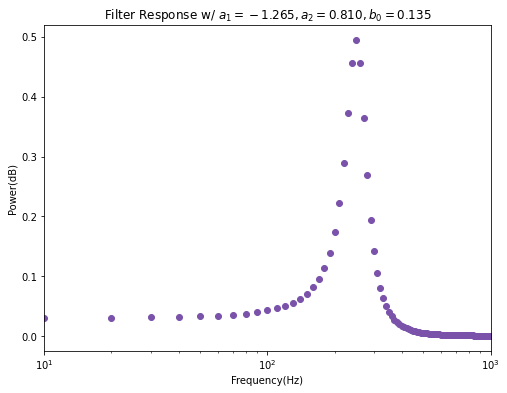

In [17]:
plotpowervsfrequency(f=10000, filter_func = lambda s: filterIIR(s, a=[-1.265, 0.810], b=[0.135]),\
    title="Filter Response w/ $a_1=-1.265, a_2=0.810, b_0=0.135$")

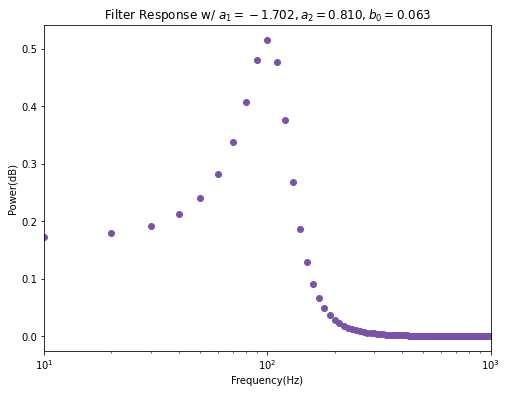

In [18]:
plotpowervsfrequency(f=10000, filter_func = lambda s: filterIIR(s,\
    a=[-1.702, 0.81], b=[0.063]), title="Filter Response w/ $a_1=-1.702, a_2=0.810, b_0=0.063$")

I suppose here I would characterize the system response by peak frequency and then perhaps some sort of metric, such as *"resonance"* from synthesizer lingo, to describe the sharpness of the peak.  If I wanted to say it in plain English, I might say something like *"peak frequency at 100Hz with severe dropoff by 300Hz and severe dampening at 10Hz"*

### 3. The impulse response function

### 3a. Deriving the impulse response function

We know that
$$y[n]=\mathcal{H}(x[n]) \text{ and } x[n]=\sum_{k=-\infty}^{\infty}x[k]\delta[n-k]$$
Because of the principle of superposition, we can say
$$x[n]=\sum_{k=-\infty}^{\infty}x[k]\delta[n-k]\implies y[n]=\sum_{k=-\infty}^{\infty}y[k]\delta[n-k]$$
if we say $h[n] = \delta[n]$, then I don't know :(

### 3b. Impulse responses

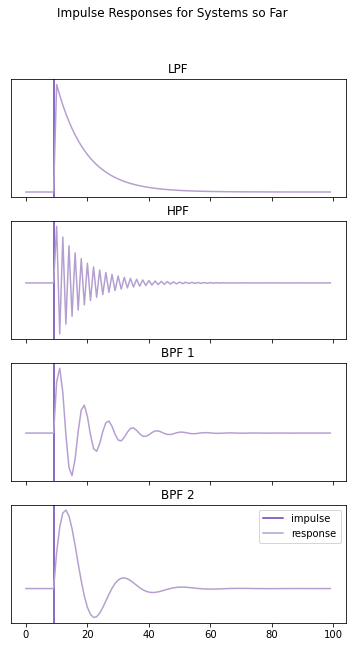

In [19]:
plotfourimpulseresponses()

These impulse response functions derived from the simple difference equations can be interpreted as a weighted average by referring to the first definition and inspecting the impulse response for the appropriate weights, like so:
$$y[n]=h_0 x[n]+h_1 x[n-1]+h_2 x[n-2]+\dots=\sum_{k=0}^{n}h_k x[n-k]$$
where $h$ is a vector that stores the weigths.

### 4. Filtering with convolution

### 4a. Implementing convolution 

Bandpass 2 reproduced by convolving the impulse response function with a signal:

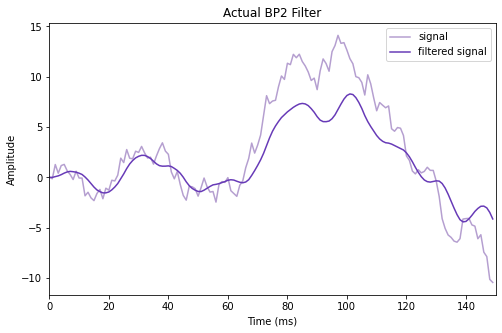

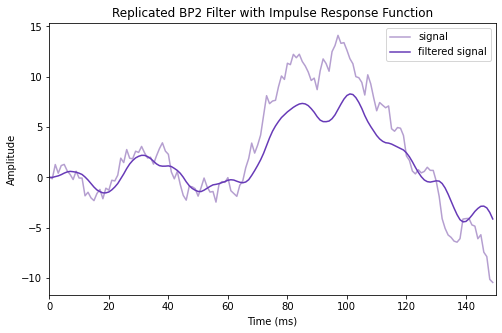

In [20]:
x = randprocess(150)
y = filterIIR(x, a=[-1.702, 0.81], b=[0.063])
plotsignalandfilter(x, y, title="Actual BP2 Filter")
y = convolve(x, h=impulseresponse(g= lambda s: filterIIR(s,\
    a=[-1.702, 0.81], b=[0.063])), h0=0)
plotsignalandfilter(x, y, title="Replicated BP2 Filter with Impulse Response Function")

### 4b. FIR filtering

Looking back at **3b**, the impulse response for bandpass 2 falls off around index 50, so I will call the convolve function, only this time with the argument `klimit = 50` to ensure it only pulls from the first 50 values of `h[k]`

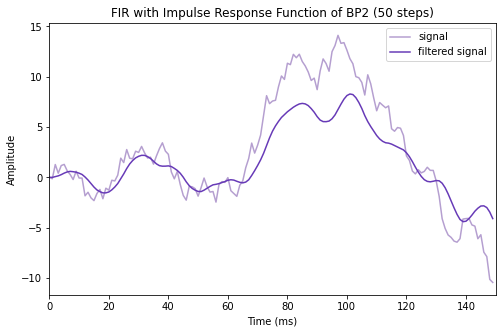

In [21]:
y = convolve(x, h=impulseresponse(g= lambda s: filterIIR(s,\
    a=[-1.702, 0.81], b=[0.063])), h0=0, klimit=50)
plotsignalandfilter(x, y, title="FIR with Impulse Response Function of BP2 (50 steps)")

It looks almost exactly the same.  But you will notice if I reduce `klimit` to something like 5, it starts to worsen.

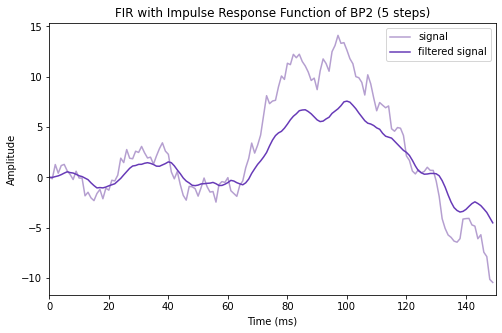

In [22]:
y = convolve(x, h=impulseresponse(g= lambda s:\
    filterIIR(s, a=[-1.702, 0.81], b=[0.063])), h0=0, klimit=5)
plotsignalandfilter(x, y, title="FIR with Impulse Response Function of BP2 (5 steps)")

### 4c. Using matched filters to detect signals in noise

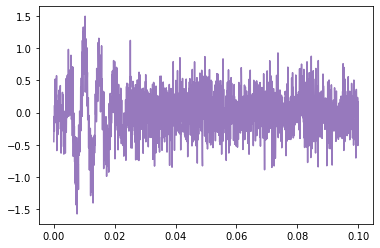

In [23]:
# Making the signal
t_20000Hz = np.linspace(0.000, 0.100, num=int((0.100-0.000)*20000)+1)\
    # 20000Hz denotes sampling rate
signal = noisysignal(t_20000Hz, g=lambda t: gammatone(t,\
    f=200.0, normalize=True), tau=0.00, T=0.100, sigma=0.3)
plt.plot(t_20000Hz, signal, c=purples[5])
plt.show()

In [24]:
# Creating the convolution kernel

h = gammatone(t_20000Hz, f=200.0, normalize=True)

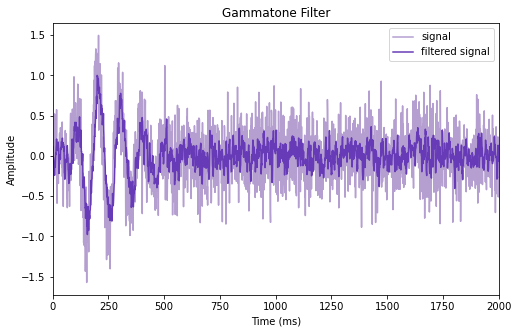

In [25]:
filtered_signal = convolve(signal, h=h, h0=0, klimit=10)
filtered_signal = filtered_signal/np.max(filtered_signal)
plotsignalandfilter(signal, filtered_signal, title="Gammatone Filter")

This is much better than threshold detection.  If you'll notice, some of the noise values almost exceed the highest peaks of the signal.  However, once the signal is convolved, the difference between the noise and signal is heightened, making it easier to detect (via thresholding).